In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('data/train.csv')
network=pd.read_csv('data/network.csv')

In [6]:
total_station=list(set(list(network.station1.value_counts().index)+list(network.station2.value_counts().index)))
index=[x for x in np.arange(len(total_station))]
dicts=dict(zip(total_station,index))

In [7]:
adj_maxtrix=np.zeros((len(dicts),len(dicts)))
for name,rows in network.iterrows():
    i,j=dicts[rows[1]],dicts[rows[2]]
    adj_maxtrix[i,j]+=1

<AxesSubplot:>

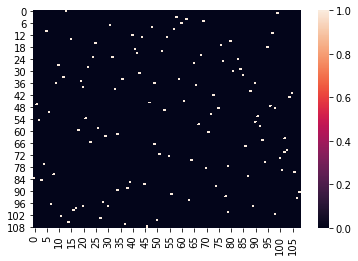

In [8]:
sns.heatmap(adj_maxtrix)

In [9]:
network=network.set_index('station1').drop(['vpGT']).reset_index()
network=network.set_index('station2').drop(['rKwb']).reset_index()

In [10]:
stations_pair={}
for name,rows in network.iterrows():
    if rows['station1'] in stations_pair:
        stations_pair[rows['station1']].append(rows['station2'])
    else:
        stations_pair[rows['station1']]=[rows['station2']]
    if rows['station2'] in stations_pair:
        stations_pair[rows['station2']].append(rows['station1'])
    else:
        stations_pair[rows['station2']]=[rows['station1']]
#del stations_pair['rKwb'],stations_pair['vpGT']

In [30]:
begin_stations=['trdb','Zlsb','thmK','Femc']

In [31]:
lines={}
i=0
for line_name in ['A','B','C','D']:
    a=df[(df["lineName"]==line_name)]["stopStation"].unique()
    lines[line_name]=a

In [41]:
all_lines=[]
for begin_station,line_name in zip(begin_stations,['A','B','C','D']):
    line=[]
    line_station=lines[line_name].tolist()
    print(line_name)
    while len(line_station)!=0:
#         print(begin_station)
#         print(line_station)
        line_station.remove(begin_station)
        line.append(begin_station)
        adj_stations=stations_pair[begin_station]
#         print(adj_stations)
        for station in adj_stations:
            if station in line_station:
                    begin_station=station
                    break
    all_lines.append(line)

A


ValueError: list.remove(x): x not in list

In [ ]:
df=pd.read_csv('data/test.csv')

In [ ]:
df[(np.isnan(df['delayTime']))&(df['target']==0)]

In [ ]:
network["station1"==begin_station]&network["station2"==begin_station]